<a href="https://colab.research.google.com/github/bhanuteja2001/COVID-19-XrayDetection/blob/main/Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/covid_image_data.zip" -d "/content/drive/My Drive/"

In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [4]:
import pandas as pd
import numpy as np

In [5]:
df_training = pd.read_csv('/content/drive/MyDrive/covid_image_data/Training_set_covid.csv')
df_training.head()

,filename,label
0,Image_1.jpg,1
1,Image_2.jpg,0
2,Image_3.jpg,0
3,Image_4.jpg,0
4,Image_5.jpg,0


In [6]:
df_testing = pd.read_csv('/content/drive/MyDrive/covid_image_data/Testing_set_covid.csv')
df_testing.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [ ]:
training_file_path = ['/content/drive/MyDrive/covid_image_data/train/' + fname[:-4] +  '.jpg' for fname in df_training['filename']]
training_file_path

In [ ]:
testing_file_path = ['/content/drive/MyDrive/covid_image_data/test/' + fname[:-4] +  '.jpg' for fname in df_testing['filename']]
testing_file_path

In [9]:
df_training.label.value_counts()

0    3073
1     406
Name: label, dtype: int64

In [10]:
# Confirm if number of images is same as number of labels given
if len(df_training) == len(training_file_path):
    print('Number of labels i.e. ', len(df_training), 'matches the number of filenames i.e. ', len(training_file_path))
else:
    print('Number of labels doesnot matches the number of filenames')

Number of labels i.e.  3479 matches the number of filenames i.e.  3479


In [14]:
images_training = [[fname, '/content/drive/MyDrive/covid_image_data/train/' + fname[:-4] + '.jpg'] for fname in df_training['filename']]
images_training = pd.DataFrame(images_training)
images_training.columns = ['filename', 'file']
images_training

,filename,file
0,Image_1.jpg,/content/drive/MyDrive/covid_image_data/train/...
1,Image_2.jpg,/content/drive/MyDrive/covid_image_data/train/...
2,Image_3.jpg,/content/drive/MyDrive/covid_image_data/train/...
3,Image_4.jpg,/content/drive/MyDrive/covid_image_data/train/...
4,Image_5.jpg,/content/drive/MyDrive/covid_image_data/train/...
...,...,...
3474,Image_3475.jpg,/content/drive/MyDrive/covid_image_data/train/...
3475,Image_3476.jpg,/content/drive/MyDrive/covid_image_data/train/...
3476,Image_3477.jpg,/content/drive/MyDrive/covid_image_data/train/...
3477,Image_3478.jpg,/content/drive/MyDrive/covid_image_data/train/...


In [12]:
df_training.head()

,filename,label
0,Image_1.jpg,1
1,Image_2.jpg,0
2,Image_3.jpg,0
3,Image_4.jpg,0
4,Image_5.jpg,0


In [22]:
X = pd.merge(df_training, images_training, left_index=True, right_index=True).drop(columns=['filename_x'])
X.rename(columns = {'filename_y':'filename'}, inplace = True)
X

,label,filename,file
0,1,Image_1.jpg,/content/drive/MyDrive/covid_image_data/train/...
1,0,Image_2.jpg,/content/drive/MyDrive/covid_image_data/train/...
2,0,Image_3.jpg,/content/drive/MyDrive/covid_image_data/train/...
3,0,Image_4.jpg,/content/drive/MyDrive/covid_image_data/train/...
4,0,Image_5.jpg,/content/drive/MyDrive/covid_image_data/train/...
...,...,...,...
3474,0,Image_3475.jpg,/content/drive/MyDrive/covid_image_data/train/...
3475,0,Image_3476.jpg,/content/drive/MyDrive/covid_image_data/train/...
3476,0,Image_3477.jpg,/content/drive/MyDrive/covid_image_data/train/...
3477,1,Image_3478.jpg,/content/drive/MyDrive/covid_image_data/train/...


In [68]:
value_one = X[X['label'] == 1]

In [69]:
value_one

,label,filename,file
0,1,Image_1.jpg,/content/drive/MyDrive/covid_image_data/train/...
11,1,Image_12.jpg,/content/drive/MyDrive/covid_image_data/train/...
14,1,Image_15.jpg,/content/drive/MyDrive/covid_image_data/train/...
23,1,Image_24.jpg,/content/drive/MyDrive/covid_image_data/train/...
35,1,Image_36.jpg,/content/drive/MyDrive/covid_image_data/train/...
...,...,...,...
3443,1,Image_3444.jpg,/content/drive/MyDrive/covid_image_data/train/...
3457,1,Image_3458.jpg,/content/drive/MyDrive/covid_image_data/train/...
3468,1,Image_3469.jpg,/content/drive/MyDrive/covid_image_data/train/...
3473,1,Image_3474.jpg,/content/drive/MyDrive/covid_image_data/train/...


In [28]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
%load_ext tensorboard

In [29]:
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt

In [30]:
datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        vertical_flip=True)

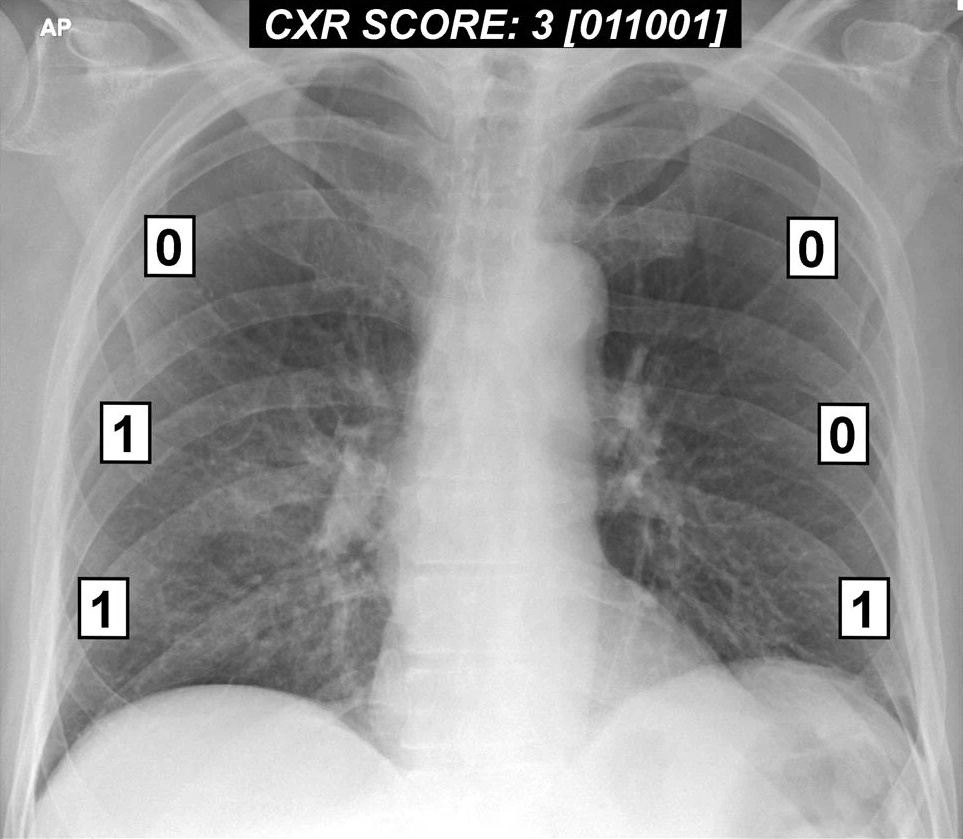

In [45]:
from PIL import Image  
  
# creating a object  
im = Image.open(r"/content/drive/MyDrive/covid_image_data/train/Image_1.jpg")  
  
im

In [35]:
pic_array.shape # Image dimension

(839, 963, 3)

In [38]:
pic = pic_array.reshape((1,) + pic_array.shape)
pic.shape

(1, 839, 963, 3)

In [78]:
for i in value_one['file']:
  pic = load_img(i)
  pic_array = img_to_array(pic)
  pic = pic_array.reshape((1,) + pic_array.shape)
  count = 1
  for batch in datagen.flow(pic, batch_size=1,save_to_dir=os.path.dirname("/content/drive/MyDrive/covid_image_data/generated_image/"), save_prefix='Image', save_format='jpg'):
    count += 1
    if count > 3:
      break

In [152]:
path, dirs, files = next(os.walk("/content/drive/MyDrive/covid_image_data/generated_image/"))
file_count = len(files)

In [153]:
file_count

1139

In [ ]:
import os
path = os.chdir("/content/drive/MyDrive/covid_image_data/train/")
k=1
for file in os.listdir(path):
    if file[-3:] == 'jpg':
        new_name="Image_ex_{}.jpg".format(k)
        k+=1
        os.rename(file,new_name)
        print("done")

In [ ]:
for i in os.listdir(os.chdir("/content/drive/MyDrive/covid_image_data/train/")):
  print(i)

In [92]:
for i in value_one['file']:
  os.remove(i)

In [151]:
#X = X[X.label != 1]
X

,label,filename,file
1,0,Image_2.jpg,/content/drive/MyDrive/covid_image_data/train/...
2,0,Image_3.jpg,/content/drive/MyDrive/covid_image_data/train/...
3,0,Image_4.jpg,/content/drive/MyDrive/covid_image_data/train/...
4,0,Image_5.jpg,/content/drive/MyDrive/covid_image_data/train/...
5,0,Image_6.jpg,/content/drive/MyDrive/covid_image_data/train/...
...,...,...,...
3472,0,Image_3473.jpg,/content/drive/MyDrive/covid_image_data/train/...
3474,0,Image_3475.jpg,/content/drive/MyDrive/covid_image_data/train/...
3475,0,Image_3476.jpg,/content/drive/MyDrive/covid_image_data/train/...
3476,0,Image_3477.jpg,/content/drive/MyDrive/covid_image_data/train/...


In [140]:
images_training = [[fname, '/content/drive/MyDrive/covid_image_data/train/' + fname[:-4] + '.jpg'] for fname in os.listdir(os.chdir("/content/drive/MyDrive/covid_image_data/train/"))]
images_training = pd.DataFrame(images_training)
images_training.columns = ['filename', 'file']
images_training['label'] = 0
#images_training.drop(images_training.tail(1).index,inplace=True)

In [146]:
images_training_2.tail()

,filename,file,label
1133,Image_gen_1134.jpg,/content/drive/MyDrive/covid_image_data/genera...,1
1134,Image_gen_1135.jpg,/content/drive/MyDrive/covid_image_data/genera...,1
1135,Image_gen_1136.jpg,/content/drive/MyDrive/covid_image_data/genera...,1
1136,Image_gen_1137.jpg,/content/drive/MyDrive/covid_image_data/genera...,1
1137,Image_gen_1138.jpg,/content/drive/MyDrive/covid_image_data/genera...,1


In [135]:
images_training_2 = [[fname, '/content/drive/MyDrive/covid_image_data/generated_image/' + fname[:-4] + '.jpg'] for fname in os.listdir(os.chdir("/content/drive/MyDrive/covid_image_data/generated_image/"))]
images_training_2 = pd.DataFrame(images_training_2)
images_training_2.columns = ['filename', 'file']
images_training_2['label'] = 1
images_training_2.drop(images_training_2.tail(1).index,inplace=True)

In [142]:
Train = images_training.append(images_training_2, ignore_index=True)

In [143]:
Train.tail()

,filename,file,label
2912,Image_gen_1134.jpg,/content/drive/MyDrive/covid_image_data/genera...,1
2913,Image_gen_1135.jpg,/content/drive/MyDrive/covid_image_data/genera...,1
2914,Image_gen_1136.jpg,/content/drive/MyDrive/covid_image_data/genera...,1
2915,Image_gen_1137.jpg,/content/drive/MyDrive/covid_image_data/genera...,1
2916,Image_gen_1138.jpg,/content/drive/MyDrive/covid_image_data/genera...,1


In [144]:
from google.colab import files
Train.to_csv('filetrain.csv')         
files.download('filetrain.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [157]:
Train = Train.drop(columns=['filename'])

In [154]:
y = np.array(Train['label'])

In [ ]:
Train = pd.merge(df_training, images_training, on='filename')
Train.drop(columns = ['filename'], inplace = True)
Train.head()

,label,file
0,1,/content/drive/MyDrive/covid_image_data/train/...
1,0,/content/drive/MyDrive/covid_image_data/train/...
2,0,/content/drive/MyDrive/covid_image_data/train/...
3,0,/content/drive/MyDrive/covid_image_data/train/...
4,0,/content/drive/MyDrive/covid_image_data/train/...


In [ ]:
train_image = []
for i in tqdm(range(Train.shape[0])):
    img = image.load_img(Train['file'][i], target_size=(28,28,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 3479/3479 [00:35<00:00, 97.24it/s] 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

## MobileNet V2

In [158]:
from tensorflow.keras.applications import MobileNetV2

In [159]:
model2 = Sequential()
model2.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(200, 200, 3)))
model2.add(tf.keras.layers.GlobalAveragePooling2D())
model2.add(Dense(1, activation = 'sigmoid'))
model2.layers[0].trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [160]:
from tensorflow.keras.optimizers import RMSprop
# model.compile(loss='binary_crossentropy',
#               optimizer=RMSprop(lr=0.001),
#               metrics=['accuracy', tf.keras.metrics.AUC()])

from tensorflow.keras import optimizers


model2.compile(optimizer=RMSprop(lr=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

In [162]:
train_image_2 = []
for i in tqdm(range(Train.shape[0])):
    img = load_img(Train['file'][i], target_size=(200,200,3), grayscale=False)
    img = img_to_array(img)
    img = img/255
    train_image_2.append(img)
X = np.array(train_image_2)

100%|██████████| 2917/2917 [00:56<00:00, 51.88it/s]


In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

In [164]:
EPOCHS = 100

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)


history = model2.fit(X_train, y_train, epochs=EPOCHS,callbacks=[es_callback], validation_data=(X_test, y_test))

Epoch 1/100
73/73 [==============================] - 78s 1s/step - loss: 0.5076 - accuracy: 0.8547 - val_loss: 0.2107 - val_accuracy: 0.9024
Epoch 2/100
73/73 [==============================] - 79s 1s/step - loss: 0.2781 - accuracy: 0.9091 - val_loss: 0.3294 - val_accuracy: 0.8750
Epoch 3/100
73/73 [==============================] - 77s 1s/step - loss: 0.2511 - accuracy: 0.9121 - val_loss: 0.1726 - val_accuracy: 0.9247
Epoch 4/100
73/73 [==============================] - 77s 1s/step - loss: 0.2284 - accuracy: 0.9216 - val_loss: 0.2123 - val_accuracy: 0.9418
Epoch 5/100
73/73 [==============================] - 77s 1s/step - loss: 0.1921 - accuracy: 0.9327 - val_loss: 0.1926 - val_accuracy: 0.9384
Epoch 00005: early stopping


## Image Testing

In [165]:
images_testing = [[fname, '/content/drive/MyDrive/covid_image_data/test/' + fname[:-4] + '.jpg'] for fname in df_testing['filename']]
images_testing = pd.DataFrame(images_testing)
images_testing.columns = ['filename', 'file']
images_testing

,filename,file
0,Image_1.jpg,/content/drive/MyDrive/covid_image_data/test/I...
1,Image_2.jpg,/content/drive/MyDrive/covid_image_data/test/I...
2,Image_3.jpg,/content/drive/MyDrive/covid_image_data/test/I...
3,Image_4.jpg,/content/drive/MyDrive/covid_image_data/test/I...
4,Image_5.jpg,/content/drive/MyDrive/covid_image_data/test/I...
...,...,...
865,Image_866.jpg,/content/drive/MyDrive/covid_image_data/test/I...
866,Image_867.jpg,/content/drive/MyDrive/covid_image_data/test/I...
867,Image_868.jpg,/content/drive/MyDrive/covid_image_data/test/I...
868,Image_869.jpg,/content/drive/MyDrive/covid_image_data/test/I...


In [167]:
test_image = []
for i in tqdm(range(images_testing.shape[0])):
    img = load_img(images_testing['file'][i], target_size=(200, 200, 3), grayscale=False)
    img = img_to_array(img)
    img = img/255
    test_image.append(img)
X = np.array(test_image)

100%|██████████| 870/870 [03:09<00:00,  4.59it/s]


In [168]:
prediction = model2.predict_classes(X)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [170]:

# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(prediction) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = res.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Using Movile Net V2 73.97081967213115


3479